# Predicción de las probabilidades de sobrevivir al hundimiento del Titanic

Este notebook es un análisis estadístico sobre las probabilidades de sobrevivir al hundimiento del Titanic, complementado con un modelo de Machine Learning para predecir dichas probabilidades de supervivencia.

El notebook se divide en las siguientes secciones:

1. Contexto
2. Presentación de los datos
3. Exploración de los datos
4. Limpieza de los datos
5. Análisis
6. Conclusiones
7. Preparación de datos para el modelo de Machine Learning
8. Modelado de datos
9. Resultados

Además de los notebooks y videos de clase, me he apoyado en las siguientes fuentes para desarrollar el notebook:

- https://www.kaggle.com/code/kenjee/titanic-project-example/notebook
- https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
- https://www.youtube.com/watch?v=LELcZ9R12B4

## 1. Contexto

El RMS Titanic fue un transatlántico británico, el mayor barco de pasajeros del mundo al finalizar su construcción, que naufragó en las aguas del océano Atlántico durante la noche del 14 y la madrugada del 15 de abril de 1912, mientras realizaba su viaje inaugural desde Southampton a Nueva York, tras chocar con un iceberg. En el hundimiento murieron 1496 personas de las 2208 que iban a bordo, lo que convierte a esta catástrofe en uno de los mayores naufragios de la historia.

En 1997 la tragedia fue inmortalizada por James Cameron en la película "Titanic", uno de los mayores éxitos de la historia del cine. Hoy en día, el hundimiento del trasanlántico sirve de base para estudiantes de Data Science de todo el mundo, que en la competición "Titanic - Machine Learning from Disaster" de Kaggle, dan sus primeros pasos en Machine Learning prediciendo las probabilidades de supervivencia de los pasajeros.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1024px-RMS_Titanic_3.jpg" alt="El RMS Titanic" />

El RMS Titanic a su salida del puerto de Southampton el 10 de abril de 1912

# 2. Presentación de los datos

En este apartado, tratamos de ver cómo son los datos y qué pueden aportarnos a la hora de esclarecer nuestra escabrosa pregunta de negocio.

Lo primero que necesitamos para llevar a cabo el análisis exploratorio de datos es cargar las librerías necesarias.

In [ ]:
# Estas librerías nos sirven para el análisis de los datos
import pandas as pd
import numpy as np
# Y estas para la visualización
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

 Cargamos el dataset que vamos a analizar.

In [ ]:
dataset = pd.read_csv('train.csv')

Y ahora, vamos a ver los rasgos superficiales del dataset, como pueden ser el número de filas y columnas, los distintos tipos de datos o el nombre de las columnas.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Vemos que el dataset tiene 891 filas y 12 columnas, aunque entre ellas está la variable "Survived" (Sobrevivió), que hace referencia a los pasajeros que sobrevivieron (o no) al hundimiento.

Para que el análisis de los datos del dataset sea más sencillo, es recomendable conocer a qué hace referencia cada columna:

- **PassengerId**: Id del pasajero
- **survival**: Si sobrevivió (1) o no (0) al hundimiento
- **pclass**: Clase del ticket (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sex**: Sexo del pasajero    
- **Age**: Edad del pasajero (en años)
- **sibsp**: Número de hermanos/cónyugues abordo del Titanic    
- **parch**: Número de padres/hijos a bordo del Titanic
- **ticket**: Número de ticket     
- **fare**: Coste del ticket     
- **cabin**: Número de la cabina donde se alojaba
- **embarked**: Puerto en el que embarcó (S = Southampton, C = Cherburgo, Q = Queenstown)

Genial. Ahora toca investigar más en profundidad el contenido del dataset. Veamos la información estadística.

In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ahora, veamos como luce el dataset. Son muchas filas, así que veamos solo una muestra.

In [ ]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


De entrada vemos que hay columnas que son irrelevantes para nuestra pregunta de negocio, como **PassengerId** y **Name**.

Observamos también que hay algunas columnas valores nulos, por ejemplo en **Cabin**, por lo que habrá que tratar los datos para que el dataset no se resienta y podamos obtener respuestas fiables en nuestro análisis, o incluso, eliminarlas por completo.

Tras las observaciones preliminares sobre el dataset, pasamos al análisis de los datos que nos presenta.

# 3. Exploración de los datos

Veamos de manera graáfica que dicen los datos de nuestro dataset sobre quién murió y quién sobrevivió al hundimiento del Titanic.

<Axes: xlabel='Survived', ylabel='count'>

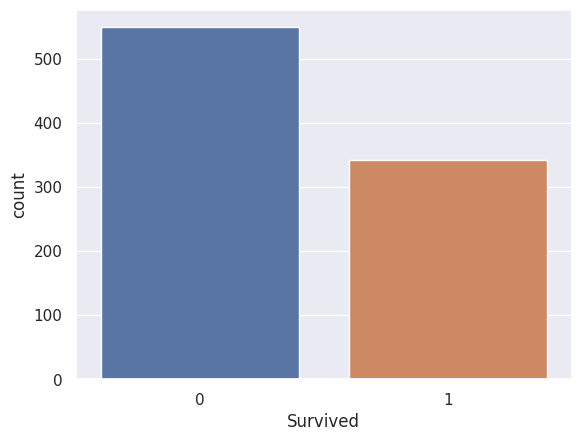

In [ ]:
sns.countplot(x='Survived', data=dataset)

Comprobamos que más pasajeros fallecieron al hundimiento de los que sobrevivieron.

Veamos las diferencias entre sexos y entre clases.

<Axes: xlabel='Survived', ylabel='count'>

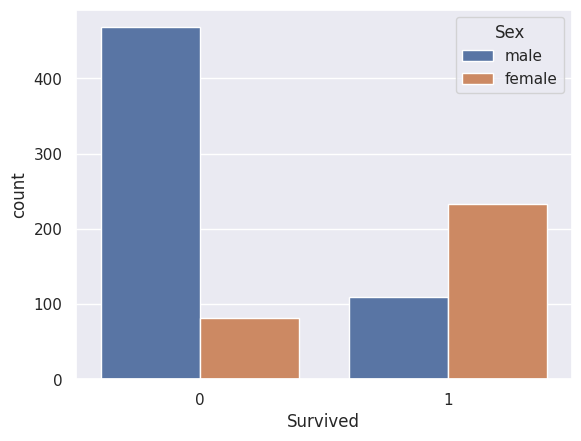

In [ ]:
sns.countplot(x='Survived', data=dataset, hue='Sex')

Claramente la balanza se inclina a favor de las mujeres. Muchos más hombres murieron en la tragedia.

<Axes: xlabel='Survived', ylabel='count'>

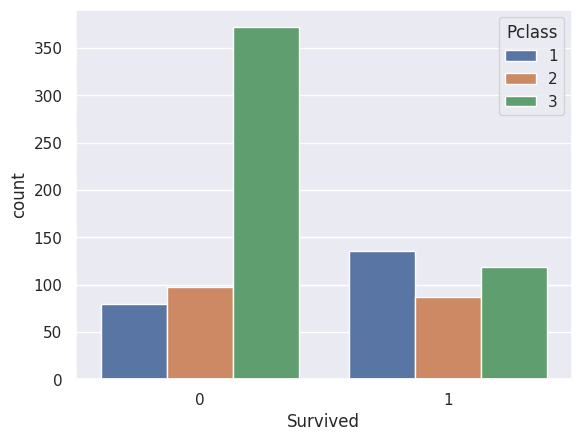

In [ ]:
sns.countplot(x='Survived', data=dataset, hue='Pclass')

En cuanto a la clase, comprobamos que la mayoría de fallecidos viajaban en tercera clase.


## 3.1. Limpieza de datos

Vamos a ver ahora cuántos valores nulos contiene el dataset. Es recomendable que el dataset no contenga datos nulos para que el análisis estadístico sea fiable y el modelo de Machine Learning pueda llevar a cabo la regresión logística de manera correcta más adelante.

In [ ]:
# Con este método podemos ver qué valores son nulos (True) y cuales no lo son (False)
dataset.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Vamos a sumar los valores nulos para una mejor comprensión.

In [ ]:
total = dataset.isnull().sum().sort_values(ascending=False)
print(total)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


Observamos que la mayoría de columnas no tienen valores nulos. **Age** tiene bastantes, pero es posible solucionarlo. La columna **Embarked** solo tiene 2. **Cabin** tiene demasiados valores nulos por lo que lo eliminaremos la columna completa.

Veamoslo en porcentaje para entender la gravedad del asunto.

In [ ]:
percent_1 = dataset.isnull().sum()/dataset.isnull().count()*100
print(percent_1)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


Hay muchos ceros, así que redondeamos para dejar un único valor decimal y ordenamos de mayor a menor.

In [ ]:
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
print(percent_2)

Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
dtype: float64


In [ ]:
missing_data = pd.concat([total, percent_2],axis=1, keys=['Total', '%'])
print(missing_data.head(5))

             Total     %
Cabin          687  77.1
Age            177  19.9
Embarked         2   0.2
PassengerId      0   0.0
Survived         0   0.0


Para hacernos una idea más clara del efecto que tienen los valores nulos en el dataset, creamos un mapa de calor.

<Axes: >

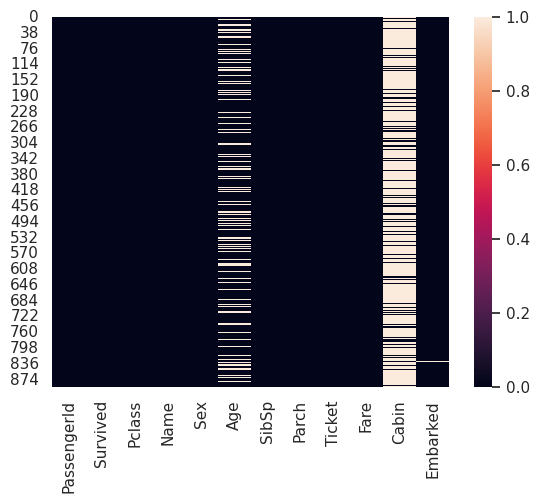

In [ ]:
sns.heatmap(dataset.isna())

La columna **Cabin** es inutilizable por la cantidad de valores nulos que contiene.
La columna **Age** tiene muchos valores nulos, pero podemos sustituirlos por la media de los valores existentes.
Los valores nulos de la columna **Embarked** no suponen ningún problema para el análisis estadístico y pueden dejarse.

In [ ]:
# Eliminamos la columna Cabin
dataset.drop('Cabin', axis=1, inplace=True)

In [ ]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Ahora nos ocupamos de la columna **Age**. Vamos a calcular la media de la edad y rellenar los valores nulos con ese dato.

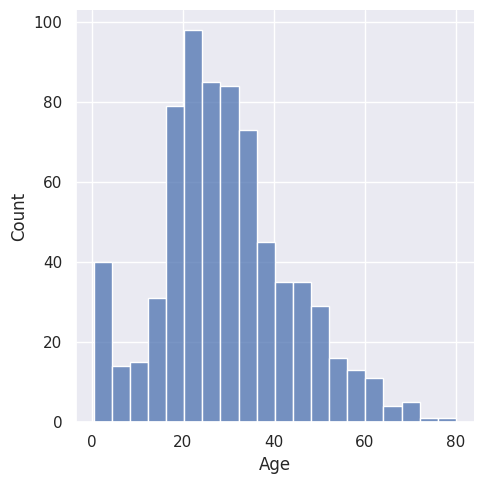

In [ ]:
sns.displot(x='Age', data=dataset)

Ahora mismo esta es la imagen que presenta la columna de edad de nuestro dataset. Con una edad media de 29.69 años, casi 30.

In [ ]:
dataset['Age'].mean()

29.69911764705882

Sustituimos los valores nulos por la media de edad que acabamos de calcular.

In [ ]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
dataset['Age'].isna().sum()

0

Y ya no hay valores nulos en la columna **Age**.

Observemos de nuevo el dataset.

In [ ]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Vamos a eliminar las columnas **Name** y **Ticket**, pues son irrelevantes para nuestro cometido; y convertiremos la columna **PassengerId** en el índice.

In [ ]:
dataset.set_index('PassengerId', inplace=True)
dataset.drop('Name', axis=1, inplace=True)
dataset.drop('Ticket', axis=1, inplace=True)

In [ ]:
dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


Mucho mejor.

# 4. Análisis

Ahora observemos la correlación entre las diferentes variables numéricas en un mapa de calor, para hacernos una idea mas clara de la relación entre ellas.

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500
Age      -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566
SibSp    -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000


<ipython-input-23-0d078d084d85>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset.corr())
<ipython-input-23-0d078d084d85>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap = 'coolwarm', annot = True)


<Axes: >

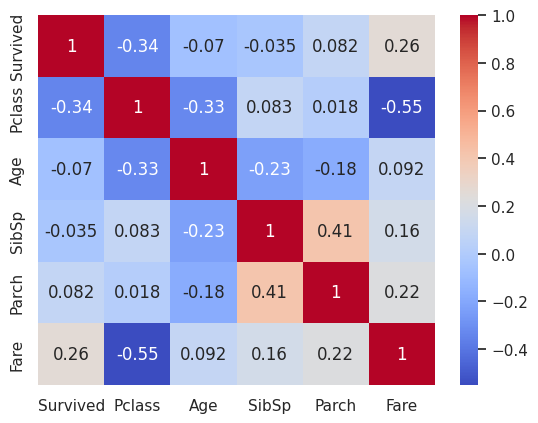

In [ ]:
print(dataset.corr())
sns.heatmap(dataset.corr(), cmap = 'coolwarm', annot = True)

In [ ]:
pd.pivot_table(dataset, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.415100,22.117887,0.329690,0.553734
1,28.549778,48.395408,0.464912,0.473684


Es interesante descubrir que la edad de los supervivientes y los fallecidos es relativamente parecida; no obstante, los supervivientes pagaron de media más por su pasaje (**Fare**).

Con una diferencia menos significativa, podemos comprobar también que los supervivientes con padres a bordo tuvieron mayores probabilidades de sobrevivir que aquellos que viajaban solos; sin embargo, si viajabas con tus hermanos tus probabilidades de sobrevivir al hundimiento fueron menores.

### Sexo

Antes hemos visto que la mayoría de pasajeros del Titanic eran adultos de entre 20 y 40 años, echemos un vistazo a cómo se distribuía el pasaje en cuestón de sexo.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


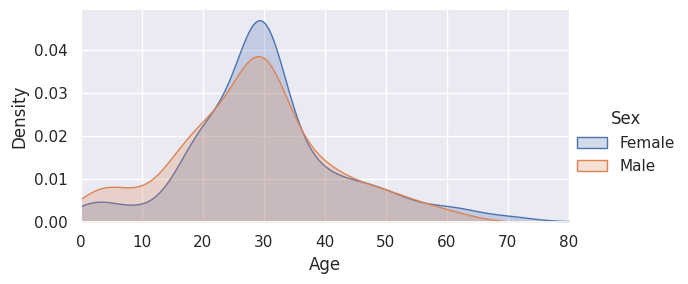

In [ ]:
fig = sns.FacetGrid(dataset, hue='Sex', aspect=2)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = dataset['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend(labels=['Female', 'Male'])

El pasaje del Titanic era bastante homogéneo, con un mayor número de hombres adultos.

Entonces, entre hombres y mujeres, ¿quién tuvo más probabilidades de sobrevivir a la tragedia?

In [ ]:
pd.pivot_table(dataset, index = 'Sex', values = ['Survived'])

,Survived
Sex,
female,0.742038
male,0.188908


Comprobamos que las mujeres (0) sobrevivieron al hundimiento del Titanic en mucha mayor medida que los hombres (1).

<Axes: xlabel='Sex', ylabel='Survived'>

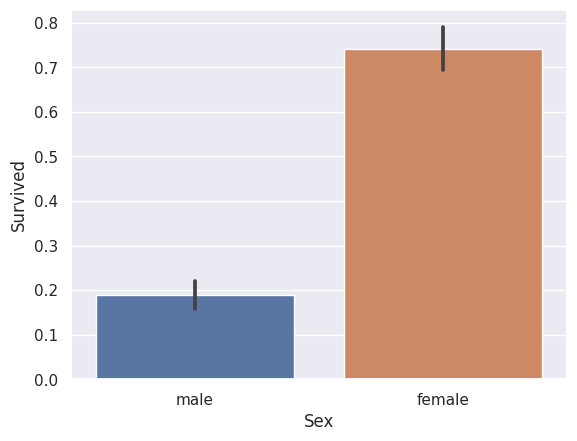

In [ ]:
sns.barplot(x='Sex', y='Survived', data=dataset)

Claramente, ser mujer fue un factor determinante para sobrevivir al hundimiento del Titanic.

### Clase

Observemos ahora la relación entre clase (**Class**) y supervivencia (**Survived**).

In [ ]:
pd.pivot_table(dataset, index = 'Pclass', values = ['Survived'])

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Vemos que la clase de pasaje influye claramente en las probabilidades de sobrevivir al hundimiento, donde los pasajeros de Clase 1 sobrevivieron en mayor medida que los de Clase 2 y 3.

<Axes: xlabel='Survived', ylabel='Fare'>

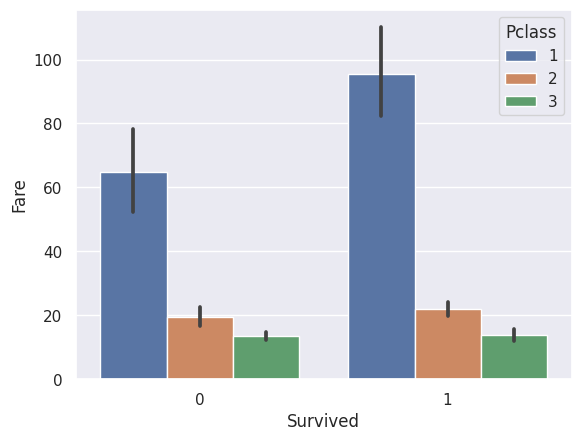

In [ ]:
sns.barplot(x='Survived', y='Fare', hue='Pclass', data=dataset)

Los pasajeros de primera clase sobrevivieron en mayor medida sobre los pasajeros de las otras dos clases.

<Axes: xlabel='Pclass', ylabel='Survived'>

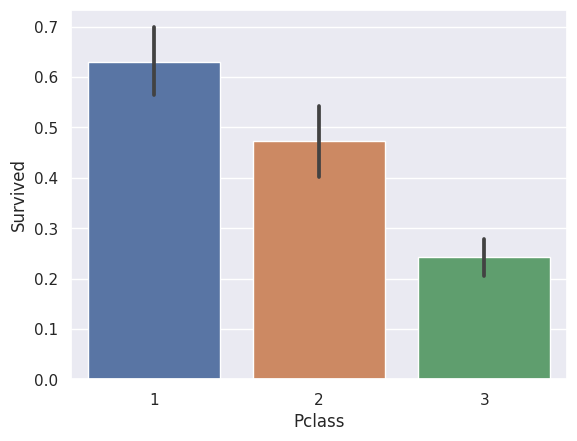

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=dataset)

### Familiares a bordo

El dataset divide los pasajeros entre aquellos que viajaron con familiares y/o cónyugyes (**SibSp**), y aquellos que lo hicieron con padres (**Parch**), lo cual es farragoso. Vamos a crear una nueva variable que distinga entre aquellos pasajeros que viajaron con familia y los que viajaron solos.

In [ ]:
dataset['Family'] = dataset.SibSp + dataset.Parch
dataset.Family

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    3
890    0
891    0
Name: Family, Length: 891, dtype: int64

Si un pasajero viajó solo (0 en Sibsp y Parch), le asignamos el valor **Alone**, si viajó con alguien (Sibsp + Parch > 0), entonces le asignamos el valor **with Family**.

In [ ]:
dataset.loc[dataset['Family'] > 0, 'Family'] = 'with Family'
dataset.loc[dataset['Family'] == 0, 'Family'] = 'Alone'

In [ ]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,with Family
2,1,1,female,38.0,1,0,71.2833,C,with Family
3,1,3,female,26.0,0,0,7.9250,S,Alone
4,1,1,female,35.0,1,0,53.1000,S,with Family
5,0,3,male,35.0,0,0,8.0500,S,Alone


<Axes: xlabel='Family', ylabel='count'>

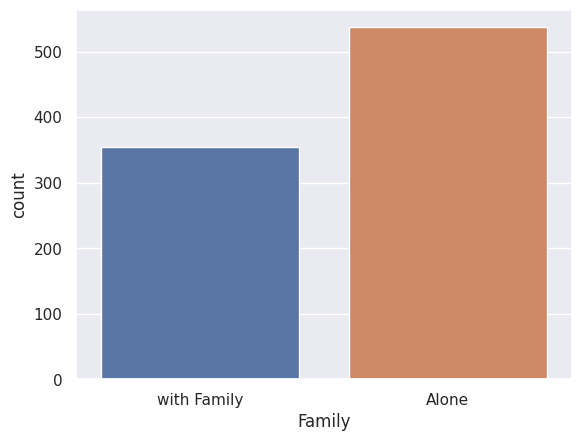

In [ ]:
sns.countplot(x="Family", data=dataset)

Podemos ver que la mayor parte de pasajeros hizo el viaje en solitario.

Veamos ahora el rango de edad de los pasajeros junto con la variable **Family**, para hacernos una mejor idea la edad de aquellos que viajaban en solitario.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


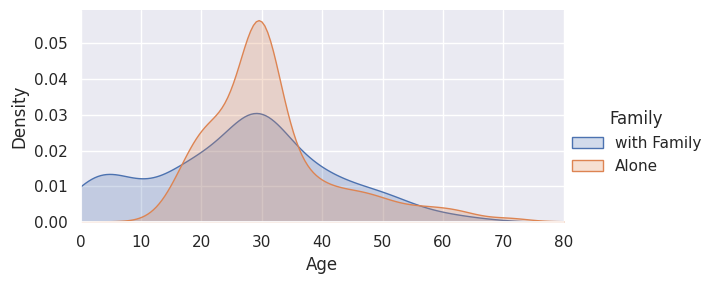

In [ ]:
fig = sns.FacetGrid(dataset, hue='Family', aspect=2)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = dataset['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend(labels=['with Family', 'Alone'])

Los pasajeros que viajaban solos eran en su mayoría adultos entre 20 y 40 años.

Veamos ahora quién tuvo más probabilidades de sobrevivir.

In [ ]:
pd.pivot_table(dataset, index = 'Family', values = ['Survived'])

,Survived
Family,
Alone,0.303538
with Family,0.505650


<Axes: xlabel='Family', ylabel='Survived'>

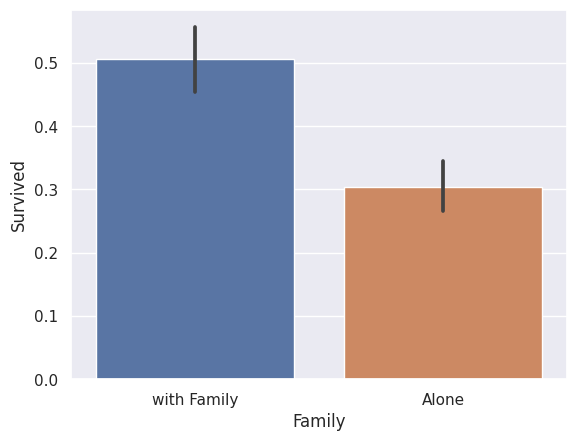

In [ ]:
sns.barplot(x='Family', y='Survived', data=dataset)

Observamos que aquellos que hicieron el viaje en compañía tuvieron más probabilidades de sobrevivir que los que viajaron en solitario.

### Edad

Veamos ahora cómo influyó la edad en las probabilidades de ver la luz del día 13 de abril de 1912.

Para ello, primero agrupamos las edades en rangos de 10 años.

In [ ]:
ages_hist = np.histogram(dataset['Age'], bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

(array([ 62, 102, 397, 167,  89,  48,  19,   6,   1]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [ ]:
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']

Ahora creamos una gráfica que mueste la distribución de edad de los pasajeros del Titanic.

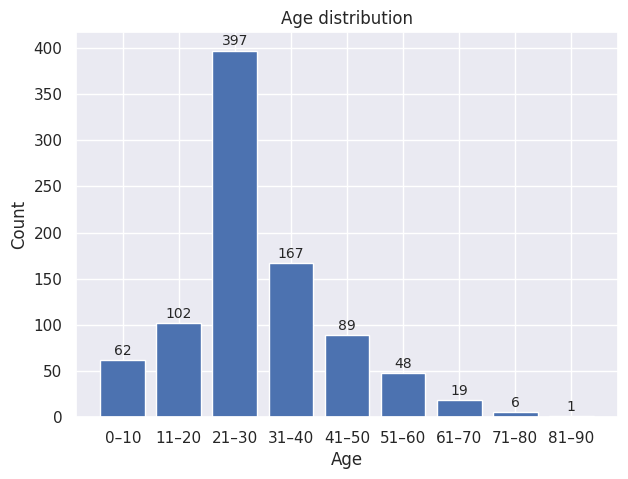

In [ ]:
plt.figure(figsize=(7,5))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('Count')

for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+10, str(int(i)), fontsize=10,
             horizontalalignment='center', verticalalignment='center')

plt.show()

Quizás influido por el ajuste realizado anteriormente con la media de edad, comprobamos que el rango de edad con más pasajeros está entre los 21 y 30 años. ¿Será ese el rango de edad donde más pasajeros fallecieron?

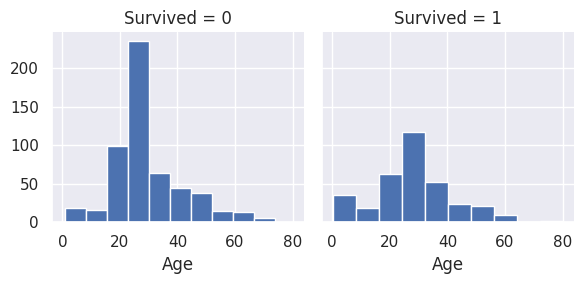

In [ ]:
age_stat = sns.FacetGrid(dataset, col='Survived')
age_stat.map(plt.hist, 'Age')

Vemos que la distribución tanto de fallecidos como supervivientes del desastre es bastante parecida. Donde los jóvenes adultos de entre 20 a 40 años tuvieron más probabilidades de morir.

### Puerto de embarque

Tras zarpar de Southampton (Inglaterra), el Titanic hizo paradas en otros dos puertos: Cherburgo (Francia) y Queenstown (Irlanda), antes de iniciar su viaje por el Atlántico del que nunca regresaría.

Observemos las probabilidades de supervivencia de los pasajeros dependiendo de donde embarcó (**Embarked**).

In [ ]:
pd.pivot_table(dataset, index = 'Embarked', values = ['Survived'])

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<Axes: xlabel='Embarked', ylabel='Survived'>

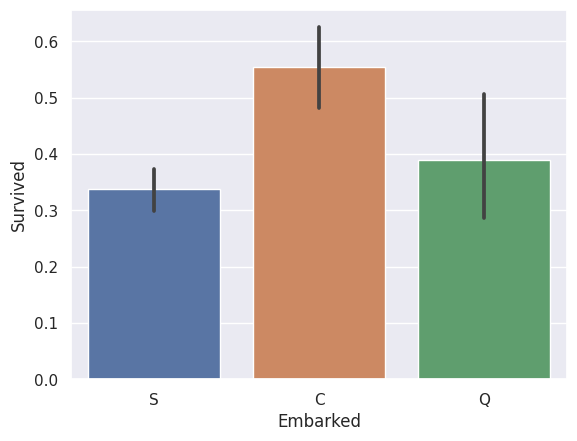

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=dataset)

Comprobamos que aquellos que embarcaron en Cherburgo (Francia) tuvieron más probabilidades de sobrevivir. ¿Es posible que más viajeros de Primera Clase embarcaran en este puerto?

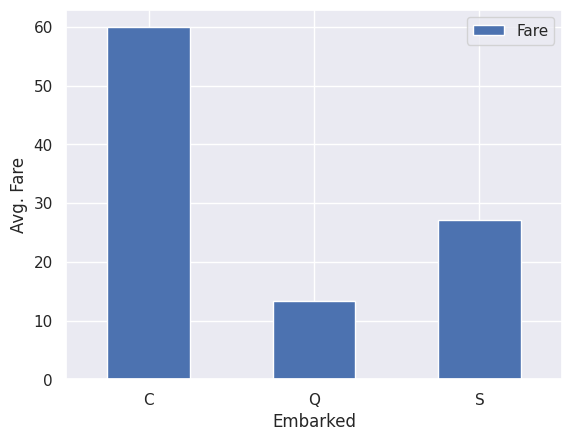

In [ ]:
embarked_fare = dataset.pivot_table(index='Embarked', values='Fare')
embarked_fare.plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

Podemos ver claramente que los pasajes más caros, con diferencia, fueron adquiridos por aquellos viajeros que embarcaron en Cherbugro.

<Axes: xlabel='Embarked', ylabel='Fare'>

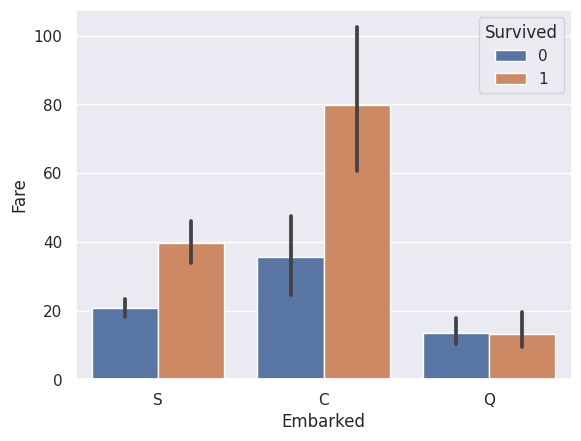

In [ ]:
sns.barplot(x='Embarked', y='Fare', hue='Survived', data=dataset)

Comprobamos que en gran medida, pasajeros que pagaron más por su pasaje embarcaron en el puerto de Cherburgo, y fueron estos los que tuvieron más probabilidades de sobrevivir al hundimiento del Titanic.

## 5. Conclusiones

Tras el análisis estadístico del dataset, hemos comprobado que las mujeres de clase alta (que pagaron más por su pasaje) y con al menos un familiar a bordo, tuvieron más probabilidades de sobrevivir al hundimiento del Titanic. Estas mujeres probablemente embarcaron en el puerto francés de Cherburgo, y de media no llegaban a los 30 años de edad.

## 6. Preparación de datos para el modelo de Machine Learning

Vamos a entrenar un algoritmo de Regresión Logística para que sea capaz de clasificar adecuadamente a los pasajeros entre los que sobrevivieron y no sobrevivieron.

Veamos las columnas con las que cuenta el dataset, así como sus data types.

In [ ]:
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Family'],
      dtype='object')

In [ ]:
dataset.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Family       object
dtype: object

Para llevar a cabo el modelado de datos, necesitamos deshacernos de las variables no numéricas o transformarlas en variables numéricas que podamos aprovechar.

Las variables **Family** y **Embarked** las podemos eliminar. **Sex** habrá que modificarla.

In [ ]:
dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,with Family
2,1,1,female,38.0,1,0,71.2833,C,with Family
3,1,3,female,26.0,0,0,7.9250,S,Alone
4,1,1,female,35.0,1,0,53.1000,S,with Family
5,0,3,male,35.0,0,0,8.0500,S,Alone


Convertiremos **Sex** a valores numéricos usando el método get_dummies().

Con el método get_dummies() lo que hacemos es convertir datos categóricos en numéricos que un modelo de Machine Learning pueda entender. Los datos numéricos son binarios, es decir 1 o 0.

In [ ]:
pd.get_dummies(dataset['Sex'])

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


En nuestra columna **Sex**, 0 = Male y 1 = Female. Con el método get_dummies se han creado dos columnas (female y male), por lo que debemos eliminar una de ellas.

Eliminamos la primera columna (female). Y convertimos el dataframe en una columna del dataset.

In [ ]:
gender = pd.get_dummies(dataset['Sex'], drop_first=True)
dataset['Gender'] = gender
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Family', 'Gender'],
      dtype='object')

Con la nueva columna **Gender** creada, veamos como queda el dataset.

In [ ]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Gender
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,with Family,1
2,1,1,female,38.0,1,0,71.2833,C,with Family,0
3,1,3,female,26.0,0,0,7.9250,S,Alone,0
4,1,1,female,35.0,1,0,53.1000,S,with Family,0
5,0,3,male,35.0,0,0,8.0500,S,Alone,1


Genial. Eliminemos las columnas con valores no numéricos del dataset.

In [ ]:
dataset.drop(['Sex', 'Embarked', 'Family'], axis=1, inplace= True)

In [ ]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,,,,,,,
1,0,3,22.0,1,0,7.2500,1
2,1,1,38.0,1,0,71.2833,0
3,1,3,26.0,0,0,7.9250,0
4,1,1,35.0,1,0,53.1000,0
5,0,3,35.0,0,0,8.0500,1


Ahora separamos la variable que queremos estudiar de las demás.

In [ ]:
x = dataset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y = dataset['Survived']

Y comprobamos que los nuevos datasets se han creado correctamente.


In [ ]:
x

,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,,,,,,
1,3,22.000000,1,0,7.2500,1
2,1,38.000000,1,0,71.2833,0
3,3,26.000000,0,0,7.9250,0
4,1,35.000000,1,0,53.1000,0
5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
887,2,27.000000,0,0,13.0000,1
888,1,19.000000,0,0,30.0000,0
889,3,29.699118,1,2,23.4500,0


In [ ]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

## 7. Modelado de datos

Una vez hemos acondicionado los datos, pasamos al modelado. Primero, cargamos las librerías necesarias.

In [ ]:
# Para dividir el dataset para poder llevar a cabo el entrenamiento del modelo y su posterior test.
from sklearn.model_selection import train_test_split
# Para cargar el modelo de regresión logística
from sklearn.linear_model import LogisticRegression
# Para cargar la matriz de confusión
from sklearn.metrics import confusion_matrix
# Para mostrar los resultados del modelado de datos sobre el dataset
from sklearn.metrics import classification_report

Ahora dividimos el data set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Y llevamos a cabo la regresión logística.

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

Realizamos la predicción sobre x_test.

In [ ]:
predict = lr.predict(x_test)

Creamos la matriz de confusión (confusion matrix), que nos permitirá visualizar el desempeño de nuestro algoritmo. Cada columna de la matriz muestra el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real.

In [ ]:
confusion_matrix(y_test, predict)

array([[156,  19],
       [ 34,  86]])

## 8. Resultados

Creamos un dataframe con la predicción.

In [ ]:
pd.DataFrame(confusion_matrix(y_test, predict), columns = ['Predicted Dead', 'Predicted Survived'], index = ['Died', 'Survived'])

,Predicted Dead,Predicted Survived
Died,156,19
Survived,34,86


Vemos que el modelo es moderadamente acertado. Ha predecido 156 muertes, fallando en 34 instancias; y ha predecido 86 supervivientes, de fallando en 19 instancias.

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       175
           1       0.82      0.72      0.76       120

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295



Vemos que la precisión del modelo ha sido de un 82%.